# Unsupervised Techniques

<!-- * Given the join distribution for r.v.s $X$ and $Y$ is $Pr(X,Y)= Pr(Y|X)\;Pr(X)$. -->
* While the *supervised learning* is interesed on $Pr(Y|X)$, *unsupervised learning* is interesed on $Pr(X)$
    * Later we has a set of $N$ observations $(x_1, x_2, ... , x_N)$ of a random $p-vector$ $X$ having joint density $Pr(X)$. 
    * We aim to directly infer the properties of this probability density without the help of a supervisor or teacher providing correct answers.
* In the context of *unsupervised learning*, there is no such direct measure of success.
* *Cluster analysis* attempts to find multiple convex regions of the $X-space$ that contain modes of $Pr(X)$. This can tell whether or not $Pr(X)$ can be represented by a mixture of simpler densities representing distinct types or classes of observations.

* *Association rules* attempt to construct simple descriptions (conjunctive rules) that describe regions of high density in the special case of very high dimensional binary-valued data.

## Association Rules

* It's a popular tool for mining comercial data bases.
* The goal is to find join values of Variables $X = (X_1, ..., X_p)$ that apear most frequently in the database
* In *Market basket analysis* the $X_j$ is a *binary-value*, that is $X_j\in\{0, 1\}$, where $X_j$ is a item, and take of the value of $1$ if was bought, and $0$ if not. 
* Where  the rows represent the transactions and the variables represent all of the items sold in the store.
* Those variables that frequently have joint values of one represent items that are frequently purchased together.
* This information can be quite useful for cross-marketing in sales promotions  and consumer segmentation based on buying patterns

## Association Pattern Mining

The problem of association pattern mining is defined in the context of supermarket data containing sets of items bought by customers, which are refered like *transactions*

The goal is to determine the *association* between groups of items bought by customers. This can be like a correlations

The model used to discover the association is *frequency* of sets

Applications: Supermarket data, text mining, ...


Because the frequent pattern mining problem was originally proposed in the context of market basket data, a significant amount of terminology used to describe both the data (e.g., `transactions`) and the output (e.g., `itemsets`) is borrowed from the supermarket analogy

A *frequent pattern* may be defined as *frequent subset*. (e.g. \{\{egg, milk\},\{milk, bread\}, \{milk, bread\}\}). Here the frequent subset is \{milk, bread\} 

Frequent itemsets can be used to generate `association rules` of the form $X \rightarrow Y$, where $X$ and $Y$ are set of items.

e.g. $\{Beer\} \rightarrow \{deaper \} $ 

This rule suggests that buying *beer* makes it more likely that *diapers* will also be bought. Given this information can tale some decision

### The Frequent Pattern Mining Model

The problem on association is defined on `unordered data`. (JSON especially).

Assumption:
* The data has $n$ transactions, denote by $T_1, T_2, \dots ,T_n$
* Each transaction is drawn from an universe of items $U$.
* The extraction can be defined binary attributes, where $1$ means the item was bought and $0$ otherwise.

Definition
* itemset is a *set of items*. $k-\text{itemset}$ is a set of item that have $k$ items.

> **Support** 
> 
> The support of an itemset $I$ is defined as the fraction of the $n$ transactions in the database  that contain $I$ as a subset. Defined $Sup(I)$

Items correlationated will have hight support

We usually define a `minsup`, minimun support to analize.



In [1]:
import os

In [89]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_json(r'./assets/unsupervised/data.json')

In [83]:
df.set_index('id', inplace=True)

In [84]:
df['items'] = df['items'].astype('str')
df['items'] = df['items'].replace(r"\[|\]|[']| ", '', regex=True) 

In [85]:
data_normalize = df['items'].str.get_dummies(',')

In [ ]:
data_normalize

We can compute $\text{Suport}(\text{Milk}, \text{Bread})$

In [87]:
milk_bread = ((data_normalize.Bread == 1) & (data_normalize.Milk == 1))
print('Suport({milk, bread}) = ', milk_bread.mean())

Suport({milk, bread}) =  0.4


We can compute the $\text{Suport}(\text{bread})$  as well

In [101]:
bread = (data_normalize.Bread == 1)
print('Suport({bread}) = ', bread.mean())

Suport({bread}) =  0.4


Recall, the analysis is done for a sample, so, if the result $Support(\{bread\}) = 0.4$ is for a sample of size 100, we can build a *Confidence Interval* 

In [99]:
se = 1.96*np.sqrt(0.4*(1-0.4)/100)
ub = 0.4 + se
lb = 0.4 - se
print(f"> p + 1.96 \u221Ap(1-p)/n: {ub}")
print(f"> p - 1.96 \u221Ap(1-p)/n: {lb}")

> p + 1.96 √p(1-p)/n: 0.4960199979171006
> p - 1.96 √p(1-p)/n: 0.30398000208289944


## Association Rule Generation Framework

Frequent itemsets can be used to generate *association* rules, with the use of a measure known as the *confidence*.

The $\text{conf}({X \rightarrow Y})$ is the conditional probabity that a transaction contains the set of items $Y$ , given that it contains the set $X$. That is $P(Y|X)$

> **Confidence**
> 
> Let $X$ and $Y$ be two sets of items. The confidence $Conf(X ⇒ Y)$  is the conditional probability of $ X ∪ Y$ occurring in a transaction, given that the transaction contains $X$

$$Conf(X ⇒ Y) = \frac{Sup (X ∪ Y)} {Sup (X)}$$

In [107]:
print('Conf({bread} -> {milk}) = %s'%(milk_bread.mean()/bread.mean()))

Conf({bread} -> {milk}) = 1.0


But the support of $\{milk\}$, that is $Sup(\{milk\})$ , already is 1, so the result don't change, if previously is bought bread

In [108]:
milk = (data_normalize.Milk == 1)
print('Suport({milk}) = ', milk.mean())

Suport({milk}) =  1.0


Technically talking, the itemsets $X$ and $Y$ are said to be the *antecedent* and the *consequent* of the rule

The *expected confidence* is defined as the support of the *consecuent*, $Y$, that is $Sup(Y)$, which is an estimate of the unconditional probability $Pr(Y)$, so the result above, $Suport(\{milk\}) =  1.0$ is *expected confidence*

The last definition is *lift*

The *lift* of the rule is defined as the *confidence* divided by the *expected confidence*

$$L(X ⇒ Y) = \frac{C(X ⇒ Y)}{Sup (Y)}$$

In terms of probability can be written like a ratio

$$P(Y|X)/P(Y)$$

In [117]:
milk = (data_normalize.Milk == 1)
print('L({bread} => {milk}) = %s'%((milk_bread.mean()/bread.mean())/milk.mean()))

L({bread} => {milk}) = 1.0


As we can see the contribution of bread to buy milk is null

What if the *consecuent* is $\{bread\}$ and and *antecedent* is $\{milk\}$?

In [120]:
(milk_bread.mean()/milk.mean())/(bread.mean())

1.0

We can see don't have any effect

##  The Apriori Algorithm

The Apriori Algorithm solves with a small number of passes over the data. Specifically, for a given support threshold $t$:

The first pass over the data computes the support of all single-item sets. Those whose support is less than the threshold are discarded. The second pass computes the support of all item sets of size two that can be formed from pairs of the single items surviving the first pass.

The Apriori algorithm represents one of the major advances in data mining technology

In [1]:
import numpy as np
from itertools import combinations, product
import pandas as pd, re

In [2]:
class Basket:
    
    def __init__(self, df:pd.DataFrame) -> None:
        """
        Columns of data frame must be binary values. I = 0 or 1
        Rows must be an id id some customer
        """
        # Convert to np.array
        self.x = df.values
        # Convert to boolean
        self.x_bool = (self.x == 1)
        # Columns to string
        self.columns = df.columns.astype(str).values
    
    def UniSupport(self, t=0):
        """ 
        This compute the support of itemset I, where length is 1, |I|=1 
        """
        self.t = t
        x_support = self.x_bool.mean(axis=0)
        self.condition = x_support>t
        self.x_support_serie = pd.Series(x_support[self.condition],self.columns[self.condition] , name = 'UniSupport',)
        x_support_serie_export = self.x_support_serie.copy()
        x_support_serie_export.index = x_support_serie_export.index.str.replace(r'((?:.|\s)+)', r'Sup(\1)', regex=True)

        return x_support_serie_export
    
    def PairSupport(self, t):
        """ 
        This compute the support of itemset I, where length is 2, |I|=2,
        given the min support above specified
        """
        self.pair_t = t
        feat_indx = np.where(self.condition)[0]
        support_pair_select = {}

        for comb in combinations(feat_indx, 2):
            X_support_select = self.x_bool[:, comb].all(axis = 1).mean()
            columns_select = self.columns[np.asarray(comb)]
            if X_support_select > t:
                support_pair_select[tuple(columns_select)] = X_support_select
        self.support_pair_select_serie = pd.Series(support_pair_select, name='PairSupport')
        support_pair_select_serie_export = self.support_pair_select_serie.copy()
        support_pair_select_serie_export.index = ['Sup('+','.join(x) +')' for x in  support_pair_select_serie_export.index]
        support_pair_select_serie_export.index.name = 'Sup(A,B)'
        
        return support_pair_select_serie_export

    def Confidence(self, given_set = 'A'):
        
        self.given_set = given_set
        df_support_uni = self.x_support_serie.reset_index().copy()
        df_support_uni.rename(columns={'index':f'{self.given_set}', 'UniSupport':f'UniSupport_{self.given_set}'}, inplace=True)
        df_support_uni[f'Sup({self.given_set})'] = self.UniSupport(self.t).index
        
        self.support_pair_select_serie.index = self.support_pair_select_serie.index.set_names(['A', 'B'])
        df_support_pair = self.support_pair_select_serie.reset_index()
        df_support_pair['Sup(A,B)'] = self.PairSupport(self.pair_t).index

        df_support_total = df_support_pair.merge(df_support_uni, on=f'{self.given_set}')
        df_support_total[f'Sup(A,B)/Sup({self.given_set})'] = df_support_total['Sup(A,B)'].add('/' + df_support_total[f'Sup({self.given_set})'])
        df_support_total.set_index(f'Sup(A,B)/Sup({self.given_set})', inplace=True)
        df_support_total['Confidence'] = df_support_total['PairSupport']/df_support_total[f'UniSupport_{self.given_set}']
        self.df_support_total = df_support_total
        
        return  df_support_total['Confidence']

    def Lift(self):
        lift_set = 'B' if self.given_set == 'A' else 'A'
        
        df_support_uni = self.x_support_serie.reset_index().copy()
        df_support_uni.rename(columns={'index':f'{lift_set}', 'UniSupport':f'UniSupport_{lift_set}'}, inplace=True)
        df_support_uni[f'Sup({lift_set})'] = self.UniSupport(self.t).index

        df_support_total_lift = self.df_support_total.merge(df_support_uni, on = f'{lift_set}', how='left')
        df_support_total_lift['Lift'] = df_support_total_lift['Confidence']/df_support_total_lift[f'UniSupport_{lift_set}']
        df_support_total_lift.index = (
            df_support_total_lift["Sup(A,B)"] + "/" + df_support_total_lift[f"Sup({self.given_set})"] + df_support_total_lift[f"Sup({lift_set})"])
        df_support_total_lift.index.name = f"Sup(A,B)/Sup({self.given_set})Sup({lift_set})"

        return  df_support_total_lift['Lift']

In [3]:
data_microsoft = pd.read_csv(r'C:\Users\LENOVO\Desktop\projects\3.- STS\data_microsoft.csv', sep=',')

In [4]:
attribute_by_idx = pd.crosstab(data_microsoft['user_ID'], data_microsoft['attribute_ID'])
attribute_by_idx.columns = attribute_by_idx.columns.astype(str)

In [13]:
sales_normalize = pd.read_csv(r'C:\Users\LENOVO\Desktop\python_course\PySpark\Learning\assets\files\sales_normalize.csv')
product_id_by_sales_id = pd.crosstab(sales_normalize['sales_id'], sales_normalize['product_id'])

In [15]:
basket = Basket(product_id_by_sales_id)

In [22]:
basket.UniSupport(0.017)

Sup(14242)    0.0182
Sup(18460)    0.0171
Sup(19888)    0.0171
Name: UniSupport, dtype: float64

In [27]:
basket.PairSupport(t=0)

Sup(A,B)
Sup(14242,18460)    0.0005
Sup(14242,19888)    0.0004
Sup(18460,19888)    0.0007
Name: PairSupport, dtype: float64

In [28]:
basket.Confidence('A')

Sup(A,B)/Sup(A)
Sup(14242,18460)/Sup(14242)    0.027473
Sup(14242,19888)/Sup(14242)    0.021978
Sup(18460,19888)/Sup(18460)    0.040936
Name: Confidence, dtype: float64

In [29]:
basket.Lift()

Sup(A,B)/Sup(A)Sup(B)
Sup(14242,18460)/Sup(14242)Sup(18460)    1.606581
Sup(14242,19888)/Sup(14242)Sup(19888)    1.285264
Sup(18460,19888)/Sup(18460)Sup(19888)    2.393899
Name: Lift, dtype: float64

In [5]:
columns_products = attribute_by_idx.columns[attribute_by_idx.columns.str.contains(r'\d{4}$', regex=True)]

In [6]:
basket = Basket(attribute_by_idx[columns_products])

We choose as a treshold $5\%$ since, this is the size data that will be used to compute the $Conf$ 

In [7]:
basket.UniSupport(0.05)

Sup(1001)    0.136070
Sup(1003)    0.090734
Sup(1004)    0.258720
Sup(1008)    0.331265
Sup(1009)    0.141481
Sup(1017)    0.156155
Sup(1018)    0.162942
Sup(1025)    0.064902
Sup(1026)    0.098438
Sup(1034)    0.286845
Sup(1035)    0.054752
Name: UniSupport, dtype: float64

In [26]:
basket.PairSupport(0.04)

Sup(A,B)
Sup(1001,1003)    0.055211
Sup(1001,1004)    0.048577
Sup(1001,1018)    0.059430
Sup(1003,1018)    0.046896
Sup(1004,1008)    0.060438
Sup(1004,1017)    0.049891
Sup(1004,1018)    0.044786
Sup(1004,1034)    0.053285
Sup(1008,1009)    0.077925
Sup(1008,1017)    0.061233
Sup(1008,1018)    0.073064
Sup(1008,1034)    0.160802
Sup(1009,1018)    0.045000
Sup(1017,1034)    0.047354
Sup(1018,1034)    0.042982
Sup(1018,1035)    0.046070
Name: PairSupport, dtype: float64

In [27]:
basket.Confidence('A') 

Sup(A,B)/Sup(A)
Sup(1001,1003)/Sup(1001)    0.405752
Sup(1001,1004)/Sup(1001)    0.356998
Sup(1001,1018)/Sup(1001)    0.436756
Sup(1003,1018)/Sup(1003)    0.516846
Sup(1004,1008)/Sup(1004)    0.233605
Sup(1004,1017)/Sup(1004)    0.192839
Sup(1004,1018)/Sup(1004)    0.173106
Sup(1004,1034)/Sup(1004)    0.205955
Sup(1008,1009)/Sup(1008)    0.235234
Sup(1008,1017)/Sup(1008)    0.184847
Sup(1008,1018)/Sup(1008)    0.220561
Sup(1008,1034)/Sup(1008)    0.485419
Sup(1009,1018)/Sup(1009)    0.318064
Sup(1017,1034)/Sup(1017)    0.303250
Sup(1018,1034)/Sup(1018)    0.263790
Sup(1018,1035)/Sup(1018)    0.282739
Name: Confidence, dtype: float64

In [28]:
basket.Lift() 

Sup(A,B)/Sup(A)Sup(B)
Sup(1001,1003)/Sup(1001)Sup(1003)    4.471879
Sup(1001,1004)/Sup(1001)Sup(1004)    1.379862
Sup(1001,1018)/Sup(1001)Sup(1018)    2.680435
Sup(1003,1018)/Sup(1003)Sup(1018)    3.171963
Sup(1004,1008)/Sup(1004)Sup(1008)    0.705192
Sup(1004,1017)/Sup(1004)Sup(1017)    1.234920
Sup(1004,1018)/Sup(1004)Sup(1018)    1.062380
Sup(1004,1034)/Sup(1004)Sup(1034)    0.718001
Sup(1008,1009)/Sup(1008)Sup(1009)    1.662652
Sup(1008,1017)/Sup(1008)Sup(1017)    1.183736
Sup(1008,1018)/Sup(1008)Sup(1018)    1.353616
Sup(1008,1034)/Sup(1008)Sup(1034)    1.692267
Sup(1009,1018)/Sup(1009)Sup(1018)    1.952006
Sup(1017,1034)/Sup(1017)Sup(1034)    1.057189
Sup(1018,1034)/Sup(1018)Sup(1034)    0.919624
Sup(1018,1035)/Sup(1018)Sup(1035)    5.163977
Name: Lift, dtype: float64

#### Understanding $\text{Lift}$

In actually $\text{Lift}$ compare the $P(A)$ against $P(A|B)$. This comparation allow us point out if the event $B$ has an effect on $A$. But, there is a problem. 

When compute $P(A)$ this is compute with all data, for instance $\text{P(1003)} = \text{Sup(1003)} = 0.090734 $ is compute with $32711$ rows, while $\text{P(1003|1001)} = \text{Sup(1001,1003)/Sup(1001)}=0.405752$ is compute using $1806$ rows, only the $ 1806/32711 \sim 6\%$ of the total data

If we only would have a sample, we can use bootstraping to find the *Confidence Interval*

In [ ]:
# Take a sample
sample = attribute_by_idx.sample(frac=0.05)

In [ ]:
a = 0
treshold = 10000
lift_boots = []

while a < treshold:
    # 1. bootstraping sample (with replacement)
    boots_sample = sample.sample(n = sample.shape[0], replace=True)
    # 2. build the `lift`
    code_1001_1003 = ((boots_sample.get('1001') == 1) & (boots_sample.get('1003') == 1))
    code_1003 = boots_sample.get('1003')
    code_1001 = boots_sample.get('1001')
    lift = (code_1001_1003.mean()/code_1003.mean())/code_1001.mean()
    lift_boots.append(lift)
    a+=1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

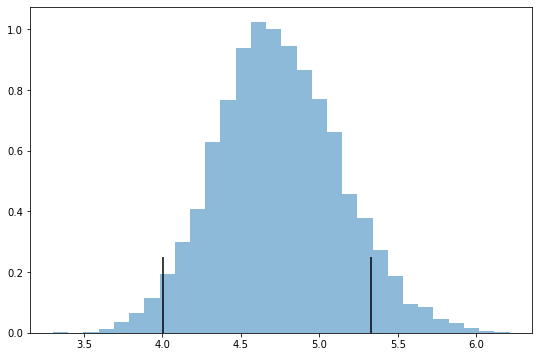

> Percentile Bootstrap confidence interval: <4.0013898573511995, 5.326907428459153>


In [ ]:
fig, ax = plt.subplots(figsize =(9, 6))

ax.hist(lift_boots, density=True, alpha = 0.5, bins = 30)
ci = [(np.quantile(lift_boots, 0.025)), np.quantile(lift_boots, 0.925)]
ax.vlines(ci, 0, 0.25, color = 'k')
plt.show()
print(f'> Percentile Bootstrap confidence interval: <{ci[0]}, {ci[1]}>')

# Cluster Analysis

The goal of cluster analysis is grouping or segmetation a collection of objects in subsets.

Central to all of the goals of cluster analysis is the notion of the degree of similarity (or dissimilarity) between the individual objects being clustered.

A clustering method attempts to group the objects based on the definition of similarity supplied to it.

There are the `cost associated` with an inaccurate prediction depends on considerations outside the data.

To all `clustering techniques` is the choice of *distance* or *dissimilarity* *measure* between two objects.

## Proximity Matrices



The proximity of the data can be measured by *similarity* or *dissimilarity*, this is usually the input of the algorithm to get the clusters.

Given $x_{i,j}$ where $i=1, 2, ..., N$ is the record for each variable $j = 1, 2, ..., p$

In the step $1$ we define a  dissimilarity measurement between the observations.

Given the *dissimilarity* between values of the $j$ th attribute is defined by $d_{j}(x_{i,j}, x_{i′,j})$, we can define the *dissimilarity*  between object $i$ and $i´$ like
$$D(x_{i}, x_{i′}) = \sum_{j=1}^{p}d_{j}(x_{i,j}, x_{i′,j})$$

The most common choice is squared distance

$$d_j(x_{i,j}, x_{i′,j}) = (x_{i,j} − x_{i′,j})^2$$

For example, given the following Table 1
<center>

|$x_1$|$x_2$|$x_3$|
|:---:|:---:|:---:|
|1.5|2.6|9.5|
|2.5|2.8|5|
|3.5|8|7|
|3.7|4.5|7.6|

</center>

We can compute the dissimilarity between the $1^{st}$ record and $2^{nd}$ record for the $x_3$ variable.

$$d_3(x_{1,3}, x_{2,3}) = (9.5 - 5)^2  = 20.25 $$

We can compute the dissimilarity between the $1^{st}$ record and $2^{nd}$ record

$$ D(x_1,x_2 ) \sum_{j=1}^{3} d_j(x_{1,j}, x_{2,j})  = 21.29 $$


There are severals measurements for each type of variable, but we will focus on *quantitative* variable.

We have yet seen one of them (squared distance), but exist others.

* Absolute difference:
$$d_j(x_{i,j}, x_{i′,j}) = l(|x_{i,j} - x_{i′,j}|)$$
* Correlation:
$$p_{i,i´}=\frac{\sum_j(x_{i,j} - \bar{x_i}) (x_{i´,j} - \bar{x_{i´}})}{ \sqrt{\sum_j (x_{i,j} - \bar{ x_i})^2 \sum_j(x_{i´,j} - \bar{x_{i´}})^2}}$$

with $\bar{x_i} = \sum_j x_{i,j}/p$. Note that this is averaged over *variables*

Following with the above example
* Absolute difference $d_3(x_{1,3}, x_{2,3}) = |9.5 - 5| = 4$
* Correlation $p_{1,2} = 0.99985431$

In [25]:
import numpy as np

x = np.array([
    [1.5, 2.6, 9.5],
    [2.5, 2.8, 5],
    [3.5, 8, 7],
    [3.7, 4.5, 7.6]]
    )

In [34]:
print('Corr(x_1, x_2):', np.corrcoef(x[:2,:])[0, 1])

Corr(x_1, x_2): 0.9998543095494895


In [31]:
np.sum((x[0, : ] - x[1, : ])**2)

21.29

In [19]:
np.sum(np.abs(x[0,:] - x[1,:]))

5.699999999999999

If the observations are first standardized both *correlation* and *squared distance* are similar  

## Object Dissimilarity

If we know the importances of the features we can compute the *weigthed* distance.

$$D(x_{i}, x_{i′}) = \sum_{j=1}^{p} w_j d_{j}(x_{i,j}, x_{i′,j})$$

where $$\sum_{j=1}^{p}w_j = 1$$

It is important to realize that setting the weight $w_j$ to the same value for each variable (say, $w_j = 1$ $∀j$) does not necessarily give all attributes equal infludence. 

The *influence* of the $j$ th attribute $X_j$ on object dissimilarity $D(x_i, x_{i′})$ depends upon its relative contribution to the average object dissimilarity measure over all pairs of observations in the data set (for all variables):

$$\bar{D}=\frac{1}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N} D(x_i, x_{i´}) = \sum_{j=1}^{p} w_j \bar{d_j}$$

where

$$\bar{d_j} = \frac{1}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N} d_j(x_{i,j}, x_{i´,j})$$

Here $\bar{d_j}$ is the average dissimilarity on the $j$ th attribute.

If we set $ w_j = {1}/{\bar{d_j}}$ , then all variables would have the same infludence on the average object dissimilarity measure.

Joining $ w_j\bar{d_j}$ represent the relative importance of each variable $j$. Where $w_j$ is subjective (apriori) importance and $\bar{d_j}$ is the importance that come from data. E.g. suppose that $\bar{d}_8$ is large, but its weights $w_8$ is small updating the importante in the overall result.

If we set the measure of the dissilarity as squared Euclidean distance
$$d_j(x_{i,j}, x_{i′,j}) = (x_{i,j} − x_{i′,j})^2$$

Then the average dissimilarity on the $j$ th attribute become in:

$$\bar{d_j} = \frac{1}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N} d_j(x_{i,j}, x_{i´,j}) = 2 var_j$$

Thus, the relative importance of each such variable is proportional to its variance over the data sets.

> Proof
>
> $\frac{1}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N}  (x_{i,j} − x_{i′,j})^2$
> 
> $\frac{1}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N} (x_{i,j}^{2} − 2\:x_{i,j}x_{i′,j} + x_{i′,j}^2)$
> 
> $\frac{1}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N} x_{i,j}^{2} − \sum_{i=1}^{N} \sum_{i´=1}^{N} 2\:x_{i,j}x_{i′,j} + \sum_{i=1}^{N} \sum_{i´=1}^{N}x_{i′,j}^2$
> 
> $\frac{1}{N^2}[ 2\:\sum_{i=1}^{N} N x_{i,j}^{2} - \sum_{i=1}^{N} \sum_{i´=1}^{N} 2\:x_{i,j}x_{i′,j}]$
> 
> $\frac{2}{N^2}[ N\sum_{i=1}^{N} x_{i,j}^{2} - \sum_{i=1}^{N} \sum_{i´=1}^{N} x_{i,j}x_{i′,j}]$
>
> $ \frac{2}{N}\sum_{i=1}^{N} x_{i,j}^{2} - \frac{2}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N} x_{i,j}x_{i′,j}$
>
> $\frac{2}{N}\sum_{i=1}^{N} x_{i,j}^{2} - 2 \bar{x_j}^2$
> 
> $\frac{2}{N} [\sum_{i=1}^{N} x_{i,j}^{2} - N \bar{x_j}^2]$
> 
> $\frac{2}{N} [\sum_{i=1}^{N} x_{i,j}^{2} - 2 N \bar{x_j}^2 + N \bar{x_j}^2]$
> 
> $\frac{2}{N} [\sum_{i=1}^{N} x_{i,j}^{2} - 2 N \sum_{i=1}^{N} \bar{x_j}^2+ \sum_{i=1}^{N} \bar{x_j}^2]$
> 
> $\frac{2}{N} [\sum_{i=1}^{N} x_{i,j}^{2} - 2\sum_{i=1}^{N} \bar{x_j}x_{ij} + \sum_{i=1}^{N} \bar{x_j}^2]$
> 
> $\frac{2}{N} [\sum_{i=1}^{N} (x_{i,j}^{2} - 2\bar{x_j}x_{ij} + \bar{x_j}^2)]$
> 
> $\frac{2}{N} [\sum_{i=1}^{N} (x_{i,j} - \bar{x_j})^2]$
>
> $2 \text{Var}(x_j)$

> In this case is no recomended to *standarize* before apply the algorithm in oder to cluster, since if we standar the data set it is as if we were applying $w_i = \frac{1}{2var_j}$
> 
> The standardization obscure the clusters

Specifying an appropriate dissimilarity measure is far more important in obtaining success with clustering than choice of clustering algorithm. 

The *Missing values* can be dropped or we can input the median or mean of the variable $j$ on the missing values.


In order to practice we wil compute the average dissimilarity of $x_3$, that is, $d_3$

In [2]:
from itertools import permutations

def ds(x):
    """
    Compute the dissimilarity
    """
    return sum((s[0] - s[1])**2 for s in permutations(x, 2))/len(x)**2
    
print("Dissimilarity: " , ds(x[:, 2]))
print("Dissimilarity: " , 2 * x[:, 2].var()) 

Dissimilarity:  5.15375
Dissimilarity:  5.1537500000000005


## Clustering Algorithms

## Combinatorial Algorithm

Given a dataset, each observation is uniquely labeled by an integer $i ∈ {1, · · ·, N}$. 

A prespecified number of clusters $K < N$ is postulated, and each one is labeled by an integer $k ∈ {1, . . . , K}$. 

Each observation is assigned to one and only one cluster. 

These assignments can be characterized by a *many-to-one* mapping, or *encoder* $k = C(i)$, that assigns the $i$ th observation to the $k$ th cluster

One seeks the particular encoder $C^∗(i)$ that achieves minimizing the loss function (this based on the dissimilarities $d(x_i, x_{i′}$) between every pair of observations). In particular, we must change the assigments made before until minimizing the loss function.

Since the goal is to assign close points to the same cluster, a natural *loss function* would be

$$W (C) = \frac{1}{2} \sum_{k =1}^{K} \sum_{C(i)=k} \sum_{C(i´)=k} d(x_{i}, x_{i′})$$

If we use the like object dissimilarity the squared Euclidean distance, that is, $d(x_i, x_{i′}) = \sum_{j=1}^{p} (x_{ij} − x_{i′j})^2 = ||x_{i} − x_{i′}||^2 $, we can write the loss function as follows. Recall, here, $p$ is the quantity of columns.

$$W (C) = \frac{1}{2} \sum_{k =1}^{K} \sum_{C(i)=k} \sum_{C(i´)=k} ||x_{i} − x_{i′}||^2$$

An approach that try to solve directly is *Combinatorial Algorithm*, but it is so expensive for large datasets.

This is the reason to use other algorithm like *k-means*, but we need to make some changes the *Loss function*.

## K-means Algorithm

We can rewrite the loss function above 

$$W (C) = \frac{1}{2} \sum_{k =1}^{K} \sum_{C(i)=k} \sum_{C(i´)=k} ||x_{i} − x_{i′}||^2$$

like

$$W (C) = \sum_{k =1}^{K}  N_k  \sum_{C(i)=k} ||x_{i} − \bar{x}_{k}||^2$$

It can be proff using with p=1. 
$$\frac{1}{N^2} \sum_{i=1}^{N} \sum_{i´=1}^{N} d_j(x_{i,j}, x_{i´,j}) = 2 var_j$$

where $\bar{x}_k = (\bar{x}_{1k}, . . . , \bar{x}_{pk})$ is the mean vector associated with the $k^{th}$ cluster, and $N_k = \sum_{i=1}^{N} I(C(i) = k)$.

Thus, the criterion is minimized by assigning the observations to the $K$ clusters in such a way that within each cluster the average dissimilarity of the observations from the cluster mean, as defined by the points in that cluster, is minimized.

$$C^* = \min_{c} \sum_{k =1}^{K} N_k \sum_{C(i)=k} ||x_{i} − \bar{x}_{k}||^2$$



<!-- can be obtained by noting that for any set of observations $S$

$$\hat{x}_S = \argmin_m \sum_{i∈S} ||x_i − m||^2$$ -->

**Algorithm** 

1. For a given cluster assignment $C$, the total cluster variance  is minimized with respect to ${m_1, . . . , m_K}$ yielding the means of the currently assigned clusters.

2. Given a current set of means ${m_1, . . . , m_K}$, is minimized by assigning each observation to the closest (current) cluster mean. That is, 

$$C(i) = \text{argmin}_{1≤k≤K} ||x_i − m_k||^2$$

3. Steps 1 and 2 are iterated until the assignments do not change.

This is the reason why K-means clustering is a *top-down* procedure.

## K-Mediods Algorithm

1. For a given cluster assignment $C$ find the observation in the cluster minimizing total distance to other points in that cluster:
Then $m_k = x_{i^∗_k}, k = 1, 2, . . . , K$ are the current estimates of the cluster centers.

$$i^{∗}_k = \text{argmin}_{\{i:C(i)=k\}}\sum _{C(i^′)=k} D(x_i , x_i^′ )$$


2. Given a current set of cluster centers $\{m_1, . . . , m_K\}$, minimize the total error by assigning each observation to the closest (current) cluster center: 
$ C(i) = \text{argmin}_{1≤k≤K} D(x_i, m_k)$

3. Iterate steps 1 and 2 until the assignments do not change.

This algortihm is robustness against outliers that produce very large distances. But increase the expensive computations.

## Practical Issues

In order to apply *K-means* or *K-medoids* one must select the number of clusters $K^∗$ and an initialization. 

The latter can be defined by specifying an initial set of centers $\{m_1, . . . , m_K\}$ or $\{i_1, . . . , i_K\}$ or an initial encoder $C(i)$. Usually specifying the centers is more convenient. Or running multiple times the *k-means* algorithm (all process) and choice the encoder such as loss function is the lowest.

A choice for the number of clusters $K$ depends on the goal. For data segmentation $K$ is usually defined as part of the problem.
For example, a company may employ K sales people, and the goal is to partition a customer database into K segments, one for each sales person, such that the customers assigned to each one are as similar as possible.

But often, we need to discover the number of distinct groups in which an item can be assigned and compute descriptive statistics within each group.

Data-based methods for estimating $K^∗$ typically examine the within-cluster dissimilarity $W_K$ as a function of the number of clusters $K$. Separate solutions are obtained for $K ∈ {1, 2, . . . , K_{\text{max}}}$.


The corresponding values ${W_1, W_2, . . . , W_{K_{\text{max}}}}$ generally decrease with increasing $K$ since a large number of cluster centers will tend to fill the feature space densely and thus will be close to all data points.

*Gap statistic*: Gap statistic is a measure of how well the clusters are separated from each other.

There are many libraries that include this algorimth, *Sklearn*, *h2o*,  

*H2O AI* implements K-Means Clustering in `H2OKMeansEstimator`

There are many parameters limits of the cluster size (*cluster_size_constrains*) or any other, but the most important is *k*, the number of clusters. The second in importance is *init*, *init* defines the initialization mode, can be *Random*, *PlusPlus*, *Furthest*. By default is used *Furthest*, here the init center of each cluster are furthest one each other in term of euclidean distance.

H2o support categorical input, but, those are converted in enum (dummies)

How works *Furthest*

**Furthest**:

Choose one center $m_1$ at random.

Calculate the difference between $m_1$
 and each of the remaining $N−1$ observations $x_i$
* $d(x_i,m_1)=||(x_i−m_1)||^2$

Choose $m_2$ to be the $x_i$ that maximizes $d(x_i,m_1)$

Repeat until $K$
 centers have been chosen.

<a name="4"></a>
## 4 - Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 32-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green, blue intensity values and alpha opacity for a color. This encoding is often refered to as the RGBA encoding.
* Our image contains thousands of colors (22,237), and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

<img src="PDX-224_Primary-Image_Green_hyperc.webp" height="500">

### 4.1 Dataset

**Load image**

First, you will use `matplotlib` to read in the original image, as shown below.

In [2]:
from sklearn.cluster import KMeans
import h2o
from h2o.estimators import H2OKMeansEstimator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
aa = np.arange(24).reshape((3, 2, 4))

In [31]:
aa

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [34]:
aa.reshape((4, 3, 2))

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [28]:
aa #.reshape((6,))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [3]:
# Load an image of a smartphone
original_img = plt.imread('PDX-224_Primary-Image_Green_hyperc.webp')

**Visualize image**

You can visualize the image that was just loaded using the code below.

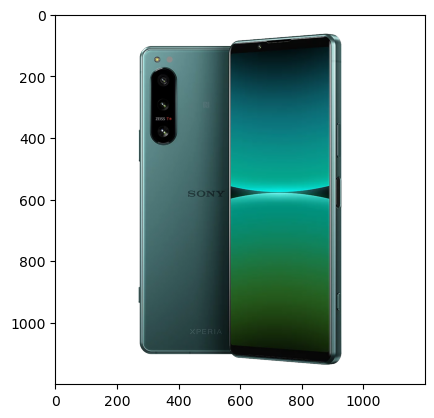

In [6]:
# Visualizing the image
plt.imshow(original_img);

**Check the dimension of the variable**

As always, you will print out the shape of your variable to get more familiar with the data.

In [8]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1200, 1200, 4)


As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, blue and alpha. 

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 4$ matrix of pixel colors (where
$m=1440000 = 1200\times 1200$)

*Note: If you'll try this exercise later on a JPG file, you first need to divide the pixel values by 255 so it will be in the range 0 to 1. This is not necessary for PNG files (e.g. `bird_small.png`) because it is already loaded in the required range (as mentioned in the [plt.imread() documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)). We commented a line below for this so you can just uncomment it later in case you want to try a different file.* 

In [14]:
normalize_img = original_img/255

In [18]:
X_img = np.reshape(normalize_img, 
                   (normalize_img.shape[0] * normalize_img.shape[1], 4))

- Inertia: Inertia is a metric used in K-means to evaluate the quality of a clustering. It measures the sum of squared distances of each point to its closest centroid. A lower inertia indicates better clustering.
- Empirical Probability Distribution: K-means++ calculates a probability for each data point to be selected as the next centroid based on its distance to the already chosen centroids. Points farther from existing centroids have a higher probability of being selected.
- Greedy Selection: The algorithm iteratively selects centroids, with each new centroid chosen based on the calculated probabilities. This is the "greedy" part, as it selects the best option 
- n_init: Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia.

In [130]:
k_means = KMeans(n_clusters=16, 
                 init='k-means++', 
                 n_init=10,
                 max_iter=300,
                 tol=1e-4,
                 random_state=0)

In [131]:
k_means.fit(X_img)

KMeans(init='random', n_clusters=16, n_init=10, random_state=0)

In [132]:
predict_class = k_means.predict(X_img)

After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid.

* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 32 bits (i.e. 8 bits x 4 channels in RGBA encoding) for each one of the $1200\times 1200$ pixel locations, resulting in total size of $1200 \times 1200 \times 32 = 46,080,000$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 32 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 32 + 1200 \times 1200 \times 4 = 5,760,512$ bits, which corresponds to compressing the original image by about a factor of 8.

In [133]:
data_predict = pd.DataFrame({'Predict':predict_class})
data_predict.index.name = 'idx'
data_predict.reset_index(inplace=True)

centroids = pd.DataFrame(data=np.abs(k_means.cluster_centers_),
                         columns=['Red', 'Green', 'Blue', 'Alpha'])

data_predict_consol = data_predict.merge(centroids, left_on='Predict', right_index=True)
data_predict_consol.sort_values(by='idx', inplace=True)

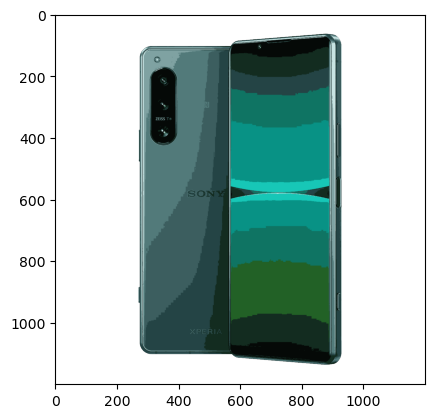

In [134]:
X_img_predict = (data_predict_consol[['Red', 'Green', 'Blue', 'Alpha']]).values

img_predict = (
    (
        (X_img_predict.reshape(
            (original_img.shape[0], original_img.shape[1], 4)
            )
        )*255).round(0).astype(int)    
    )

plt.imshow(img_predict);

Using H2O, you can perform unsupervised clustering.

In [3]:
import h2o
from h2o.estimators import H2OKMeansEstimator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
h2o.init(max_mem_size=2)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,17 days 2 hours 22 mins
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"2 years, 11 months and 12 days !!!"
H2O_cluster_name:,H2O_from_python_caima_03dgoe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,511.5 Mb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [16]:
data_crime = h2o.import_file('./data_csv/CRIME1.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
data_crime['arr86'] = (data_crime['narr86'] == 0).ifelse(0, 1)

In [71]:
# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

In [72]:
data_crime_train, data_crime_valid = data_crime.split_frame(ratios=[0.8], seed=1234)

In [73]:
kmeans = H2OKMeansEstimator(k=8, init = 'Furthest', seed = 1324)

In [74]:
kmeans.train(x=features,
             training_frame=data_crime_train)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [75]:
kmeans.model_performance()


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 4671.154949234076
Total Sum of Square Error to Grand Mean: 10990.000272364312
Between Cluster Sum of Square Error: 6318.845323130236

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,2063.0,4.157803e+03
1,,2.0,1.0,2.639665e-13
2,,3.0,15.0,9.726334e+01
3,,4.0,1.0,1.090326e-13
4,,5.0,12.0,8.601450e+01
5,,6.0,47.0,2.137761e+02
6,,7.0,56.0,9.783168e+01
7,,8.0,4.0,1.846608e+01


The `between-cluster sum of squares` is a measure of the variability between clusters in a clustering algorithm. It is calculated as the sum of the squared distances between each cluster center and the overall mean of all data points. The goal of clustering algorithms is to minimize this sum, which is also known as the sum of squared error (SSE) 12.

The `within-cluster` sum of squares is another measure that quantifies the variability within each cluster. It is calculated as the sum of the squared distances between each data point and its assigned cluster center 2.

The `between-cluster sum of squares` can be calculated by subtracting the within-cluster sum of squares from the total sum of squares. The total sum of squares is defined as the sum of the squared distances between each data point and the overall mean 2.

In [76]:
pred = kmeans.predict(data_crime_valid)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


### Using Clustering for Preprocessing

Given a initial model, can apply the `kmeans` like preprocessing.

Firstly, the initial model

In [77]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [78]:
logit_model  = H2OGeneralizedLinearEstimator(
    family = 'binomial',
    lambda_ = 0,
    compute_p_values = True
    )

In [79]:
logit_model.train(features, target, training_frame=data_crime_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [80]:
logit_model.model_performance()


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.19018408861429698
RMSE: 0.43610100735299495
LogLoss: 0.5617411552305458
Null degrees of freedom: 2198
Residual degrees of freedom: 2193
Null deviance: 2585.3594528061494
Residual deviance: 2470.5376007039404
AIC: 2482.5376007039404
AUC: 0.6500602046959663
AUCPR: 0.3587212804639584
Gini: 0.3001204093919325

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2559647885888409: 


,,0,1,Error,Rate
0,0,701.0,894.0,0.5605,(894.0/1595.0)
1,1,120.0,484.0,0.1987,(120.0/604.0)
2,Total,821.0,1378.0,0.4611,(1014.0/2199.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.255965,0.488396,114.0
1,max f2,0.140635,0.669818,196.0
2,max f0point5,0.270390,0.426457,102.0
3,max accuracy,0.461203,0.725784,4.0
4,max precision,0.461203,0.600000,4.0
5,max recall,0.118197,1.000000,206.0
6,max specificity,0.580395,0.999373,0.0
7,max absolute_mcc,0.270390,0.232041,102.0
8,max min_per_class_accuracy,0.270390,0.600993,102.0
9,max mean_per_class_accuracy,0.270390,0.628083,102.0



Gains/Lift Table: Avg response rate: 27.47 %, avg score: 10.68 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010005,0.548518,0.165488,0.165488,0.045455,0.788629,0.045455,0.788629,0.001656,0.001656,-83.451234,-83.451234
1,,2,0.020009,0.436430,0.165488,0.165488,0.045455,0.459991,0.045455,0.624310,0.001656,0.003311,-83.451234,-83.451234
2,,3,0.030014,0.435140,0.000000,0.110325,0.000000,0.435546,0.030303,0.561388,0.000000,0.003311,-100.000000,-88.967489
3,,4,0.040018,0.295500,0.992926,0.330975,0.272727,0.370948,0.090909,0.513778,0.009934,0.013245,-0.707405,-66.902468
4,,5,0.050023,0.221454,1.654877,0.595756,0.454545,0.253419,0.163636,0.461707,0.016556,0.029801,65.487658,-40.424443
5,,6,0.191451,0.124151,0.526794,0.544812,0.144695,0.129785,0.149644,0.216510,0.074503,0.104305,-47.320649,-45.518790
6,,7,0.209186,0.114164,0.746816,0.561939,0.205128,0.114540,0.154348,0.207865,0.013245,0.117550,-25.318390,-43.806147
7,,8,0.367440,0.094196,0.920644,0.716430,0.252874,0.101043,0.196782,0.161857,0.145695,0.263245,-7.935602,-28.356952
8,,9,0.405184,0.089153,1.228198,0.764104,0.337349,0.090468,0.209877,0.155207,0.046358,0.309603,22.819756,-23.589649
9,,10,0.638472,0.082468,1.043250,0.866099,0.286550,0.083021,0.237892,0.128831,0.243377,0.552980,4.324968,-13.390078


In [81]:
logit_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-0.158525,0.094196,-1.682932,9.238825e-02,-1.039223
1,pcnv,-0.930067,0.134708,-6.904311,5.044742e-12,-0.366944
2,avgsen,0.068474,0.049702,1.377700,1.682958e-01,0.230889
3,tottime,-0.052589,0.042345,-1.241920,2.142661e-01,-0.236041
4,ptime86,-0.145185,0.037008,-3.923054,8.743345e-05,-0.295367
5,qemp86,-0.210973,0.031051,-6.794492,1.086953e-11,-0.338283


If we use the clusters found by *k-means* algorithm like input fectures we can improve the metrics 

In [85]:
data_crime_train['cluster'] = kmeans.predict(data_crime_train)
data_crime_valid['cluster'] = kmeans.predict(data_crime_valid)

kmeans prediction progress: |█████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [91]:
data_crime_valid['cluster'] = data_crime_valid['cluster'].asfactor()
data_crime_train['cluster'] = data_crime_train['cluster'].asfactor()

In [92]:
features = ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'cluster']
logit_model.train(x=features, y=target, training_frame=data_crime_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [93]:
logit_model.model_performance()


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.18929845089383657
RMSE: 0.4350844181234678
LogLoss: 0.5594518297328616
Null degrees of freedom: 2198
Residual degrees of freedom: 2186
Null deviance: 2585.3594528061494
Residual deviance: 2460.4691471651245
AIC: 2486.4691471651245
AUC: 0.6530943137702673
AUCPR: 0.3683696203012761
Gini: 0.30618862754053455

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2511835453591923: 


,,0,1,Error,Rate
0,0,695.0,900.0,0.5643,(900.0/1595.0)
1,1,114.0,490.0,0.1887,(114.0/604.0)
2,Total,809.0,1390.0,0.4611,(1014.0/2199.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.251184,0.491474,126.0
1,max f2,0.152603,0.671133,185.0
2,max f0point5,0.269722,0.426056,111.0
3,max accuracy,0.660588,0.726694,2.0
4,max precision,0.674819,1.000000,0.0
5,max recall,0.060230,1.000000,233.0
6,max specificity,0.674819,1.000000,0.0
7,max absolute_mcc,0.269722,0.231436,111.0
8,max min_per_class_accuracy,0.269722,0.600993,111.0
9,max mean_per_class_accuracy,0.269722,0.627769,111.0



Gains/Lift Table: Avg response rate: 27.47 %, avg score: 32.80 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010005,1.108728,0.165488,0.165488,0.045455,21.671361,0.045455,21.671361,0.001656,0.001656,-83.451234,-83.451234
1,,2,0.020009,0.629747,1.654877,0.910182,0.454545,0.788617,0.250000,11.229989,0.016556,0.018212,65.487658,-8.981788
2,,3,0.030014,0.499554,1.158414,0.992926,0.318182,0.559026,0.272727,7.673001,0.011589,0.029801,15.841361,-0.707405
3,,4,0.040473,0.463554,0.158293,0.777234,0.043478,0.468951,0.213483,5.811280,0.001656,0.031457,-84.170746,-22.276583
4,,5,0.050023,0.441030,0.000000,0.628853,0.000000,0.461588,0.172727,4.789975,0.000000,0.031457,-100.000000,-37.114690
5,,6,0.104593,0.128184,1.001200,0.823121,0.275000,0.211783,0.226087,2.401353,0.054636,0.086093,0.120033,-17.687878
6,,7,0.199636,0.125069,0.383235,0.613699,0.105263,0.125081,0.168565,1.317661,0.036424,0.122517,-61.676542,-38.630089
7,,8,0.200091,0.118474,0.000000,0.612304,0.000000,0.119115,0.168182,1.314937,0.000000,0.122517,-100.000000,-38.769567
8,,9,0.374716,0.094585,0.872258,0.733448,0.239583,0.102890,0.201456,0.750100,0.152318,0.274834,-12.774214,-26.655227
9,,10,0.409277,0.089975,1.149704,0.768598,0.315789,0.090982,0.211111,0.694441,0.039735,0.314570,14.970373,-23.140177


We can see the *AUC* and *Accuracy* are increased .

#### Tracking a Map

The goal is monitoring the amount of color in a map, this can be applied in the bussiness, for instance, a company can monitor their infludence area or their costumers.

The requirements are:
* The images can be compared if, and only if, the size of the pixels are the same.
* The areas are the same.

In [94]:
from matplotlib.image import imread
from IPython.display import Image as ImageDisplay

# read the files and convert to numpy arrays by pixel
image_map = imread(r'assets/unsupervised/map.JPG')
print('Height: {}, Weight: {} in pixels descomposed in tuple {} (red, green, blue)'.format(*image_map.shape))

Height: 444, Weight: 1308 in pixels descomposed in tuple 3 (red, green, blue)


In [214]:
# We join the pixels in a single array
map_array = image_map.reshape(image_map.shape[0]*image_map.shape[1], 3)

In [231]:
h2o.H2OFrame(np.arange(map_array.shape[0]))

array([     0,      1,      2, ..., 580749, 580750, 580751])

In [216]:
frame_map = h2o.H2OFrame(map_array, column_names=['red', 'blue', 'green'])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [219]:
frame_map.shape[0]

580752

In [232]:
frame_map['index'] = h2o.H2OFrame(np.arange(map_array.shape[0]))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [234]:
features = ['red', 'blue', 'green']

In [235]:
kmeans_map = H2OKMeansEstimator( k=8, init = 'Furthest', seed = 1324)

In [236]:
kmeans_map.train(x = features, training_frame=frame_map)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [237]:
kmeans_map.model_performance()


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 108115.67900803855
Total Sum of Square Error to Grand Mean: 1742252.9981447153
Between Cluster Sum of Square Error: 1634137.3191366768

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,53127.0,12587.186672
1,,2.0,15972.0,8553.072995
2,,3.0,55285.0,11324.740010
3,,4.0,53593.0,9935.115302
4,,5.0,71704.0,16582.809044
5,,6.0,150553.0,18549.594367
6,,7.0,147102.0,23442.076701
7,,8.0,33416.0,7141.083918


In [238]:
frame_map['cluster'] = kmeans_map.predict(frame_map)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [239]:
grouped = frame_map.group_by(by='cluster')

Distribution of colors

In [179]:
count_clusters = grouped.count()
frame_count_cluster = count_clusters.get_frame()
counts_normalize = (frame_count_cluster['nrow']/frame_count_cluster['nrow'].sum()).as_data_frame()

Colors

In [240]:
mean_clusters = grouped.mean(col=['red', 'blue', 'green']).get_frame()
mean_clusters_df = mean_clusters.as_data_frame()
mean_clusters_df.drop(columns=['cluster'], inplace=True)
colors =( mean_clusters_df/255).values.tolist()

In [241]:
import matplotlib.patches as patches

def color_swatches(colors:list):

    ncolors = len(colors)
    
    # Figsize is in inches
    fig, ax = plt.subplots(figsize=(ncolors*2, 2))

    for (start_x, color) in enumerate(colors):
        # (start_x, 0) is the origin of the rectangle
        color_rect = patches.Rectangle((start_x, 0), 1, 1, color=color)
        ax.add_patch(color_rect)

    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_xticklabels([])

    return fig

Percentage of composition:  [ 9.  3. 10.  9. 12. 26. 25.  6.]


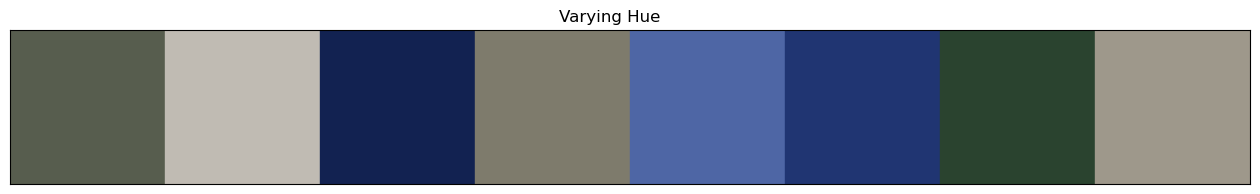

In [242]:
fig = color_swatches(colors)
fig.suptitle("Varying Hue")
print("Percentage of composition: ", counts_normalize.nrow.values.round(2)*100)

In [243]:
predict_map = frame_map.merge(mean_clusters)

In [246]:
predict_map_df = predict_map.as_data_frame()

In [248]:
predict_map_df.sort_values('index', inplace=True)

In [250]:
predict_map_array = predict_map_df[['mean_red', 'mean_blue', 'mean_green']].values

In [251]:
predict_map_normalize = predict_map_array.reshape(image_map.shape)

In [253]:
from PIL import Image
img_map_out = Image.fromarray(predict_map_normalize.astype("uint8") , 'RGB')
img_map_out.save("./assets/unsupervised/map_predict.png")

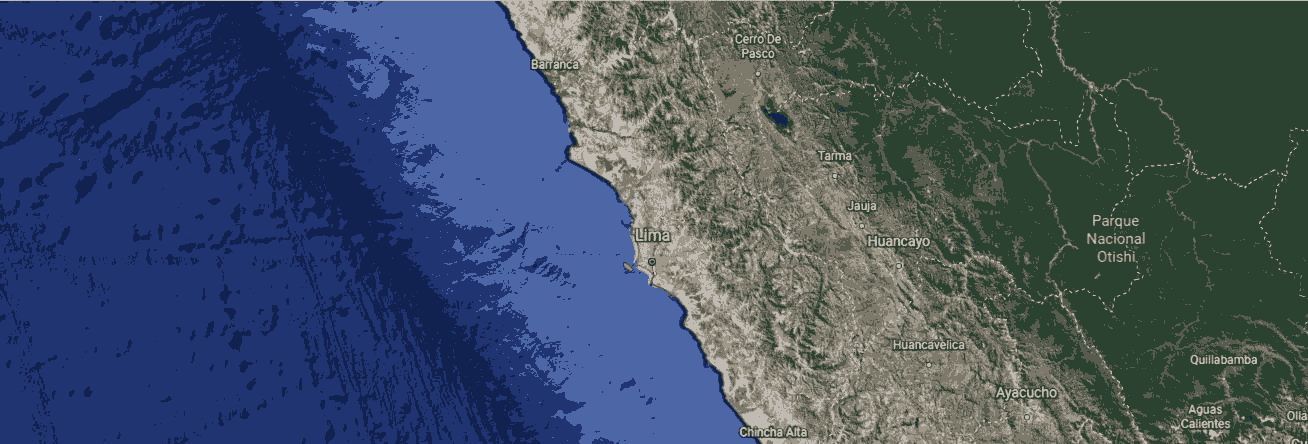

In [254]:
ImageDisplay("assets/unsupervised/map_predict.png")

## Density-Based Clustering - DBSCAN

* Clusters are dense regions in the data space, separated by regions of lower object density
* A cluster is defined as a maximal set of densityconnected points
* Discovers clusters of arbitrary shape

Density Definition 

* $\epsilon$ - Neighborhood: Objects within a radius of from an object.
 $$N_{\epsilon}(p) = \{ q | d(p, q) \leq \epsilon \}$$

* *High density*: $ε$ - Neighborhood of an object contains at least *MinPts* of objects.
  
  Given MinPts = 4, $p$ is *high density*, but $q$ is *low density*.

<div align="center">
    <img src="assets/unsupervised/minpts.JPG" />
</div>

Given $\epsilon$ and *MinPts*, then the data is clustering

* A point is a *core point* if it has more than a specified number of points (MinPts) within Eps—These are points that are at the interior of a cluster.
* A *border point* has fewer than *MinPts* within Eps, but is in the neighborhood of a core point.
* A *noise point* is any point that is not a core point nor a border point

<div align="center">
    <img src="assets/unsupervised/grouping.JPG" />
</div>

In this case $\epsilon = 1 cm.$ and *MinPts* $= 5$

**Density-reachability**

* Directly density-reachable

  An object $q$ is directly *density-reachable* from object $p$ if $p$ is a *core object* and $q$ is in $p$’s $\epsilon$-neighborhood. Two conditions.

  So Given the following parameters $\epsilon = 1 cm.$ and *MinPts* $= 4$ and the image.

  * $q$ is directly density-reachable from $p$
  * $p$ is not directly density-reachable from $q$
  * Density-reachability is asymmetric

<div align="center">
    <img src="assets/unsupervised/grouping_01.JPG" />
</div>

* Density-Reachable (directly and indirectly)

  So Given the following parameters $\epsilon = 1 cm.$ and *MinPts* $= 7$ and the image.

  * A point $p$ is directly density-reachable from $p_2$ 
  * $p_2$ is directly density-reachable from $p_1$
  * $p_1$ is directly density-reachable from $q$
  * $p \leftarrow p_2 \leftarrow  p_1 \leftarrow q$ form a chain
  * $p$ is (indirectly) density-reachable from $q$, the inverse is false.

<div align="center">
    <img src="assets/unsupervised/grouping_02.JPG" /> 
</div>

When DBSCAN Works Well

* Resistant to Noise
* Can handle clusters of different shapes and sizes

When DBSCAN Does NOT Work Well

* Cannot handle varying densities
*  sensitive to parameters—hard to determine the correct set of parameters

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

* `dbscan.labels_`: get the clusters
  * A cluster index equal to -1 point out that they are considered as anomalies by the algorithm.
* `dbscan.core_sample_indices_`: get the indeces of teh cores.
* `dbscan.components_`: the data to get the cores.

In [371]:
# labels
labels_clusters = dbscan.labels_

# uniques clusters
clusters = np.unique(labels_clusters)

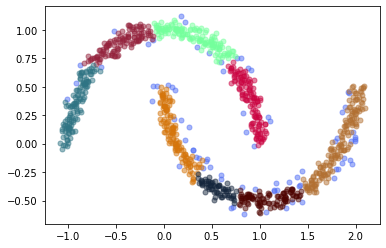

In [386]:
def plot_fig(clusters, labels_clusters):
    _, ax = plt.subplots()
    random_abs = np.abs(np.random.randn(len(clusters), 3))
    colors = np.abs(random_abs)/random_abs.max()

    for (cluster, color) in zip(clusters, colors):
        ax.scatter(
            X[labels_clusters == cluster,0], 
            X[labels_clusters == cluster,1], 
            alpha = 0.5, 
            s = 25, 
            color = tuple(color) 
        )

np.random.seed(599)
plot_fig(clusters, labels_clusters)

In [330]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.2, min_samples=10)

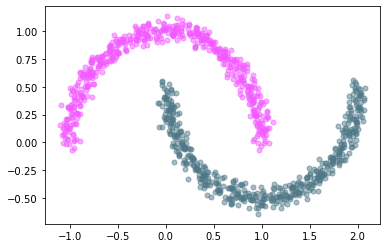

In [367]:
labels_clusters = dbscan.labels_

clusters = np.unique(labels_clusters)

np.random.seed(128)
plot_fig(clusters, labels_clusters)

## Hierarchical Clustering

* K-means or K-medoids clustering algorithms depend on the choice for the number of clusters.

* Hierarchical clustering methods require the user to specify a measure of dissimilarity between (disjoint) groups of observations based on the pairwise dissimilarities among the observations.  
<!-- in the two groups. -->

* They produce hierarchical representations in which the clusters at each level of the hierarchy are created by merging clusters at the next lower level. 

  At the lowest level, each cluster contains a single observation. At the highest level there is only one cluster containing all of the data. 

* Strategies:
  * *Agglomerative*: start at the bottom and at each level recursively merge a selected pair of clusters into a single cluster. 
  
    This produces a grouping at the next higher level with one less cluster. 
    
    The pair chosen for merging consist of the two groups with the smallest intergroup dissimilarity. 
  
  * *Divisive*: start at the top and at each level recursively split one of the existing clusters at that level into two new clusters. 

    The split is chosen to produce two new groups with the largest between-group dissimilarity. 


* With both paradigms there are N − 1 levels in the hierarchy.

* Each level of the hierarchy represents a particular grouping of the data into disjoint clusters of observations. 

* The user to decide which level (if any) actually represents a “natural” clustering

* That is, observations within each of its groups are sufficiently more similar to each other than to observations assigned to different groups at that level.

**Dendrogram**

* Recursive binary splitting/agglomeration can be represented by a rooted binary tree. 

* The nodes of the trees represent groups.
  * The root node represents the entire data set. 
  * The $N$ terminal nodes each represent one of the individual observations (singleton clusters). 
  * Each nonterminal node (`parent`) has two daughter nodes. 

    * For *divisive* clustering the two daughters represent the two groups resulting from the split of the parent.
    
    * For *agglomerative* (the most studied) clustering the daughters represent the two groups that were merged to form the parent, starting from bottom.
  
  * The binary tree can be plotted so that the *height* of each node is proportional to the value of the intergroup dissimilarity between its two daughters. 
  
  * The terminal nodes representing individual observations are all plotted at zero height.

  * Cutting the *dendrogram* horizontally at a particular height partitions the data into disjoint clusters represented by the vertical lines that intersect it. These are the clusters that would be produced by terminating the procedure when the optimal intergroup dissimilarity exceeds that threshold cut value. 

  * Groups that merge at high values, relative to the merger values of the subgroups contained within them lower in the tree, are candidates for natural clusters.


  * Such a dendrogram is often viewed as a graphical summary of the data itself, rather than a description of the results of the algorithm. However, such interpretations should be treated with caution. First, different hierarchical methods (see below), as well as small changes in the data, can lead to quite different dendrograms

**Agglomerative Clustering**

* Agglomerative clustering algorithms begin with every observation representing a singleton cluster. At each of the $N −1$ steps the closest two (least dissimilar) clusters are merged (given a measure of dissimilarity) into a single cluster, producing one less cluster at the next higher level

* Let $G$ and $H$ represent two groups. The dissimilarity $d(G, H)$ between $G$ and $H$ is computed from the set of pairwise observation dissimilarities $d_{ii′}$ where one member of the pair $i$ is in $G$ and the other $i′$ is in $H$

    * The dissimilarity $d(G, H)$ between $G$ and $H$ under **Single linkage (SL)** agglomerative clustering takes the intergroup dissimilarity to be that of the closest (least dissimilar) pair 

    $$d_{S,L} (G, H) = \min_{i \in G, i´ \in H} d_{i, i´}$$

    * **Complete linkage** (CL) agglomerative clustering (furthest-neighbor technique) takes the intergroup dissimilarity to be that of the furthest (most dissimilar) pair

    $$d_{S,L} (G, H) = \max_{i \in G, i´ \in H} d_{i, i´}$$

    * **Group average** (GA) clustering uses the average dissimilarity between the groups

    $$d_{S,L} (G, H) = \frac{1}{N_G N_H} \sum_{i \in G} \sum_{i´ \in H} d_{i, i´}$$

  * **Ward's** minimum variance criterion minimizes the total within-cluster variance. 

    To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging. 
    
    This increase is a weighted squared distance between cluster centers. At the initial step, all clusters are singletons (clusters containing a single point). 
    
    To apply a recursive algorithm under this objective function, the initial distance between individual objects must be (proportional to) squared Euclidean distance.
    
    The initial cluster distances in Ward's minimum variance method are therefore defined to be the squared Euclidean distance between points:

  $$ d_{ij}=d(\{X_{i}\},\{X_{j}\})= \|X_{i}-X_{j}\|^{2}.$$
  Note: In software that implements Ward's method, it is important to check whether the function arguments should specify Euclidean distances or squared Euclidean distances.

  Where $N_G$ and $N_H$ are the respective number of observations in each group.

  The algorithms works very well if the data are compacted

> User Case:
> 
> Many clusters, possibly connectivity constraints, transductive (transduction or transductive inference is reasoning from observed, specific (training) cases to specific (test) cases)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load the data
data_crime = pd.read_stata(r'data_dta/CRIME1.dta')
# Metadata --> http://eswf.uni-koeln.de/daten/crime1.html

# Generate the variable arr86, where a person is labeled equal to 0, if he or she has not arrested in 1986
# otherwise 1.
data_crime['arr86'] = np.where(data_crime.narr86 == 0, data_crime.narr86, 1)

# select the columns with dtype float64
columns_float = data_crime.dtypes[(data_crime.dtypes == np.float64) | (data_crime.dtypes == np.float32)].index.copy()

In [3]:
cluster = AgglomerativeClustering(
    n_clusters=2, 
    metric='euclidean', 
    linkage='ward'
    )

In [78]:
X = data_crime[columns_float].copy()

In [84]:
cluster.fit(X)

AgglomerativeClustering(metric='euclidean')

In [85]:
# Unsupervised learning like supervised learning, but without a label.
np.mean(cluster.labels_ == data_crime.arr86)

0.6895412844036697

Any change in the sample (for instance, in size) will produce different result.

For intance, if we drop 1% of the sample the result may be different

In [251]:
sample = X.sample(frac=0.99, replace=False)
cluster.fit(sample)
np.mean(cluster.labels_ == data_crime.loc[data_crime.index.isin(sample.index) , 'arr86'])

0.31690140845070425

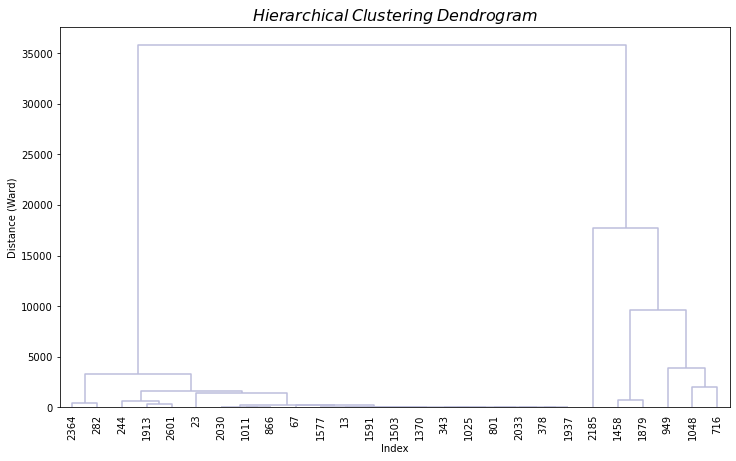

In [258]:
sample = X.sample(frac=0.01, replace=False)

values_to_dendrogram = linkage(sample, 'ward')

fig, ax = plt.subplots(figsize = (12, 7))

dendrogram(
    values_to_dendrogram, 
    labels=sample.index, 
    leaf_rotation=90, ax=ax, 
    above_threshold_color='#bcbddc', 
    color_threshold=0
)

ax.set_title(r'$Hierarchical \:Clustering\: Dendrogram$', fontdict={'fontsize':16})
ax.set_xlabel('Index')
ax.set_ylabel('Distance (Ward)');

We can use Plotly

https://plotly.com/python/dendrogram/

## Principal Components

Principal components are a sequence of projections of the data, mutually uncorrelated and ordered
in variance.

The best way to learn this topic is firstly learn Singular Value Descomposition (SVD)

### Singular Value Descomposition

A **singular value decomposition** of an $ m \times n $ matrix $ X $ of rank $ p \leq \min(m,n) $ is


<a id='equation-eq-svd101'></a>
$$
X  = U \Sigma V^\top \tag{5.1}
$$

where

$$
\begin{aligned}
UU^\top  &  = I  &  \quad U^\top  U = I \cr
VV^\top  & = I & \quad V^\top  V = I
\end{aligned}
$$

and

- $ U $ is an $ m \times m $.<!-- orthogonal  matrix of **left singular vectors** of $ X $   -->
- Columns of $ U $ are eigenvectors of $ X X^\top $, i.e. $XX^T = U\Sigma^2 U^\top$
- $ V $ is an $ n \times n $ <!-- orthogonal matrix of **right singular vectors** of $ X $   -->
- Columns of $ V $  are eigenvectors of $ X^\top  X $. i.e $X^TX = V\Sigma^2 V^\top$ 
- $ \Sigma $ is an $ m \times n $ matrix in which the first $ p $ places on its main diagonal are positive numbers $ \sigma_1, \sigma_2, \ldots, \sigma_p $ called **singular values**; remaining entries of $ \Sigma $ are all zero  
- The $ p $ singular values are positive square roots of the eigenvalues of the $ m \times m $ matrix  $ X X^\top $ or $ n \times n $ matrix $ X^\top  X $  
- We adopt a convention that when $ U $ is a complex valued matrix, $ U^\top $ denotes the **conjugate-transpose** of $U$.
  <!-- $ U_{ij}^\top $ is the complex conjugate of $ U_{ji} $.   -->
- Similarly, when $ V $ is a complex valued matrix, $ V^\top $ denotes the **conjugate-transpose** of $ V $  


The matrices $ U,\Sigma,V $ entail linear transformations that reshape in vectors in the following ways:

- multiplying vectors  by the unitary matrices $ U $ and $ V $ **rotates** them, but leaves **angles between vectors** and **lengths of vectors** unchanged.  
- multiplying vectors by the diagonal  matrix $ \Sigma $ leaves **angles between vectors** unchanged but **rescales** vectors.  


Thus, representation [(5.1)](#equation-eq-svd101) asserts that multiplying an $ n \times 1 $  vector $ y $ by the $ m \times n $ matrix $ X $
amounts to performing the following three multiplications of $ y $ sequentially:

- **rotating** $ y $ by computing $ V^\top  y $  
- **rescaling** $ V^\top  y $ by multiplying it by $ \Sigma $  
- **rotating** $ \Sigma V^\top  y $ by multiplying it by $ U $  


This structure of the $ m \times n $ matrix  $ X $ opens the door to constructing systems
of data **encoders** and **decoders**.

Thus,

- $ V^\top  y $ is an encoder  
- $ \Sigma $ is an operator to be applied to the encoded data  
- $ U $ is a decoder to be applied to the output from applying operator $ \Sigma $ to the encoded data  


In [94]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
import cv2

In [ ]:
np.set_printoptions(precision=2)

# Define the matrix
A = np.array([[1, 2, 3, 4, 5],
              [2, 3, 4, 5, 6],
              [3, 4, 5, 6, 7],
              [4, 5, 6, 7, 8],
              [5, 6, 7, 8, 9]])

# Compute the SVD of the matrix
U, S, V = np.linalg.svd(A, full_matrices=True)

# Compute the rank of the matrix
rank = np.linalg.matrix_rank(A)

# Print the rank of the matrix
# number of columns such as is not linear combination of them
print("Rank of matrix:\n", rank)
print("S: \n", S)

# Compute the four fundamental subspaces
row_space = U[:, :rank]
col_space = V[:, :rank]
null_space = V[:, rank:]
left_null_space = U[:, rank:]


print("U:\n", U)
print("Column space:\n", col_space)
print("Left null space:\n", left_null_space)
print("V.T:\n", V.T)
print("Row space:\n", row_space.T)
print("Right null space:\n", null_space.T)

In [64]:
response = requests.get(url='https://i.ibb.co/0sMMPnM/sony-xperia-z5-01-w-1x.jpg')
response_bytes = BytesIO(initial_bytes=response.content)
img_readed = Image.open(fp=response_bytes)

In [307]:
# X means matrix of the image
X = np.array(img_readed)
X_mean = X.mean(axis=2)

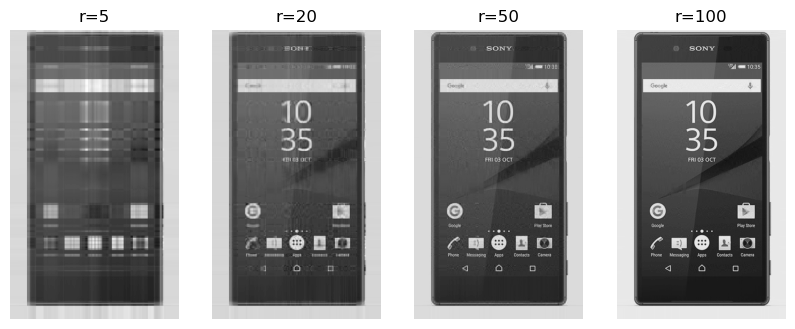

In [353]:
U, S, VT = np.linalg.svd(X_mean, full_matrices=True)
S_diag = np.diag(S)

# plots
fig, ax = plt.subplots(1, 4, 
                       figsize=(10, 4), sharey=True)

for idx, r in enumerate([5, 20, 50, 100]):
    x_approx = U[:, :r] @ S_diag[:r, :r] @ VT[:r, :]
    ax[idx].imshow(x_approx, cmap='gray')
    ax[idx].set_title(f'r={r}')
    ax[idx].axis('off')

plt.show()

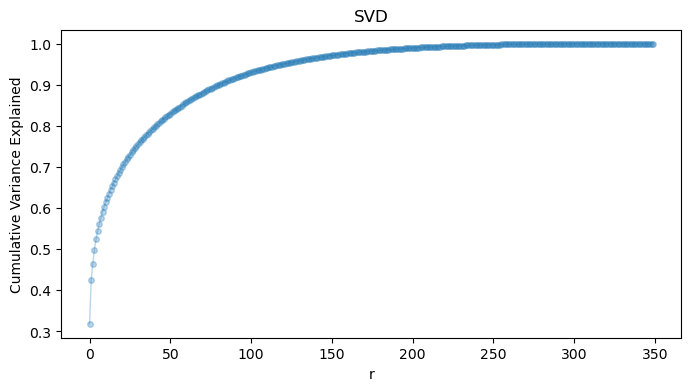

In [376]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

svd_cumsum=S.cumsum()/S.sum()
ax.plot(svd_cumsum, 'o-', linewidth=1, markersize=4, alpha = 0.3) 
ax.set_title('SVD')
ax.set_xlabel('r')
ax.set_ylabel('Cumulative Variance Explained');

In [377]:
from sklearn.decomposition import PCA
import pandas as pd

In [428]:
def pca_(X, n_components=None):
  """
  Performs Principal Component Analysis (PCA) on a data matrix.

  Args:
    X: A numpy array of shape (num_samples, num_features) representing the data.
    n_components: (Optional) The number of principal components to return.
                   If None, all components are returned.

  Returns:
    A tuple containing:
      X_pca: The transformed data of shape (num_samples, n_components).
      explained_variance: The variance explained by each principal component.
      eigenvectors: The eigenvectors of the covariance matrix.
  """

  # Standardize data (optional)
  # X_std = (X - X.mean(axis=0)) / X.std(axis=0)  # Uncomment for standardization

  # Centering data (recommended)
  X_centered = X - X.mean(axis=0)

  # Calculate covariance matrix
  cov_matrix = np.cov(X_centered.T)
  print(cov_matrix.shape)

  # Calculate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort eigenvalues and eigenvectors in descending order
  sort_index = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sort_index]
  eigenvectors = eigenvectors[:, sort_index]

  # Select top n_components
  if n_components is not None:
    eigenvalues = eigenvalues[:n_components]
    eigenvectors = eigenvectors[:, :n_components]

  # Project data onto principal components
  X_pca = np.dot(X_centered, eigenvectors)

  # Calculate explained variance
  explained_variance = eigenvalues / np.sum(eigenvalues)

  return X_pca, explained_variance, eigenvectors

In [379]:
# Load the data
data_crime = pd.read_stata(r'data_dta/CRIME1.dta')
# Metadata --> http://eswf.uni-koeln.de/daten/crime1.html

# Generate the variable arr86, which a person is labeled equal to 0 if he or she has not arrested in 1986
# otherwise 1.
data_crime['arr86'] = np.where(data_crime.narr86 == 0, data_crime.narr86, 1)

# select the columns with dtype float64
columns_float = data_crime.dtypes[(data_crime.dtypes == np.float64) | (data_crime.dtypes == np.float32)].index.copy()

In [381]:
X = data_crime.drop(columns=['nparr86', 'narr86', 'nfarr86' , 'arr86'])
pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X)

PCA(n_components=14)

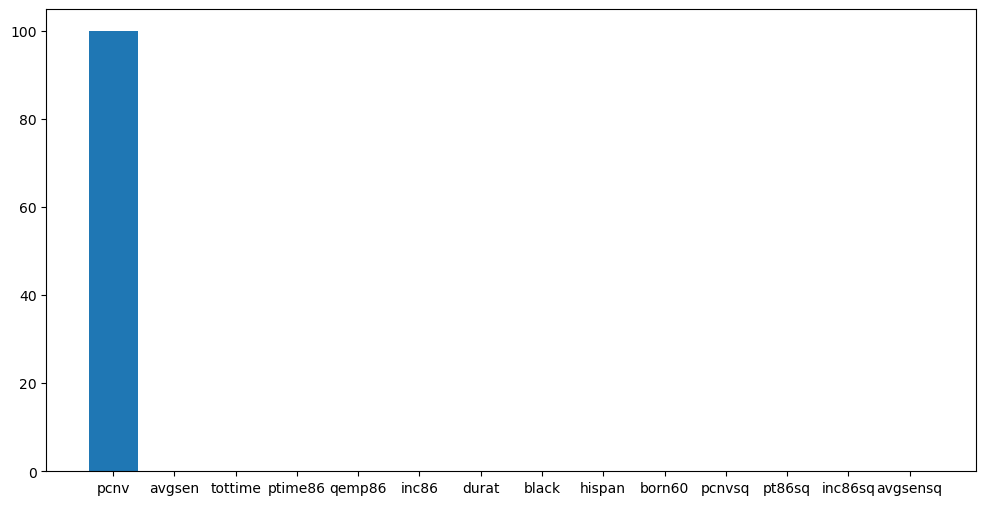

In [384]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(
    x =pca.feature_names_in_, 
    height=np.round(pca_model.explained_variance_ratio_*100, 2)
);

In [403]:
X_trans = pca_model.transform(X)

In [406]:
evr = pca_model.explained_variance_ratio_
cum_evr = np.round(np.cumsum(evr), 5)
X_trans_selected = X_trans[:, cum_evr<1].copy()